In [0]:
import numpy as np
X=np.load('mouse_data.npy')
Y=np.load('/content/mouse_data_labels (1).npy')

In [0]:
from tensorflow.keras.layers import Input,Dense,Bidirectional,LSTM
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.optimizers import Adam

In [0]:

inputs=Input((100,9))
step=Bidirectional(LSTM(6))(inputs)
pred=Dense(2)(step)
model=Model(inputs=inputs,outputs=pred)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=2e-5),
              metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 9)]          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 12)                768       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 26        
Total params: 794
Trainable params: 794
Non-trainable params: 0
_________________________________________________________________


In [0]:
#X=np.array(user)[:,:,:-1]
#Y=np.zeros([X.shape[0],1])
model.fit(x=X,y=Y,batch_size=16,epochs=1,validation_split=0.1)

Train on 541 samples, validate on 61 samples
541/541 [==============================] - 2s 3ms/sample - loss: 0.5571 - accuracy: 0.9445 - val_loss: 0.5676 - val_accuracy: 0.9180


In [0]:
model.save('mouser.h5')

In [0]:
#model=load_model('/content/mouse_model.h5')
pred=model.predict(X[593][np.newaxis,:,:])
pred[0][0]

0.16855529

In [0]:
np.exp(0.26)/(np.exp(0.16)+0.26)

0.9047228820584098

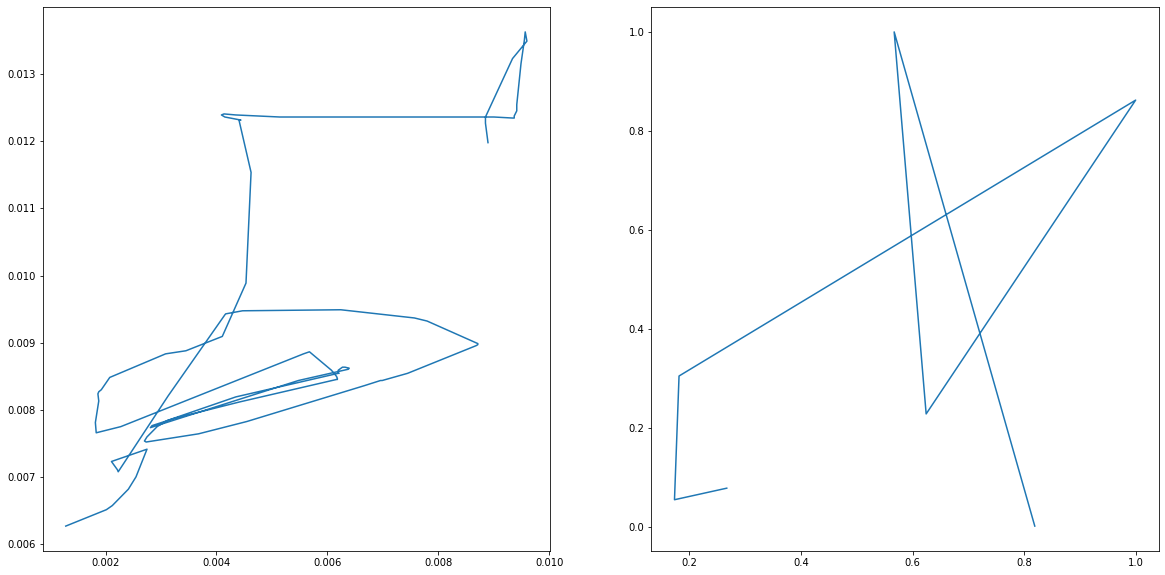

In [0]:
import matplotlib.pyplot as plt
f=plt.figure(figsize=[20,10])
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)
ax1.plot(X[1,:,0],X[1,:,1])
ax2.plot(X[593,:,0],X[593,:,1])
#plt.plot(data['x'][100:200],data['y'][100:200])
plt.show()